In [170]:
import numpy as np
import pandas as pd

In [171]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [172]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [173]:
df.shape

(5572, 5)

In [174]:
# 1. Data cleaning
# 2.EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [175]:
## 1. Data Cleaning

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [177]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],inplace=True)

In [178]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [179]:
df.sample(5)

,v1,v2
1958,ham,"Lol ... Oh no babe, I wont be sliding into you..."
3974,ham,do u think that any girl will propose u today ...
4142,spam,In The Simpsons Movie released in July 2007 na...
1762,ham,Sometimes Heart Remembrs someone Very much... ...
398,ham,"Good evening Sir, Al Salam Wahleykkum.sharing ..."


In [180]:
#renamimg the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
997,ham,Not a lot has happened here. Feels very quiet....
3603,ham,Hey morning what you come to ask:-) pa...
17,ham,Eh u remember how 2 spell his name... Yes i di...
4334,ham,"Now u sound like manky scouse boy steve,like! ..."
1955,ham,"Aight I'll grab something to eat too, text me ..."


In [181]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [182]:
df['target']=encoder.fit_transform(df['target'])

In [183]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [184]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [185]:
#checking duplicate values
df.duplicated().sum()

403

In [186]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [187]:
df.duplicated().sum()

0

In [188]:
## 2. EDA

In [189]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [190]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

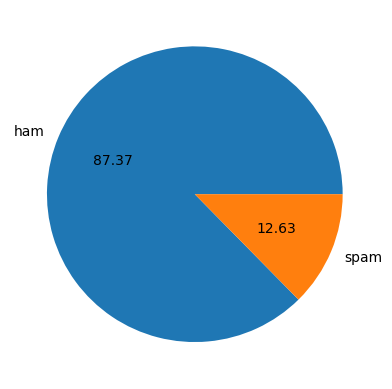

In [191]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [192]:
#Data is imbalanced

In [193]:
import nltk

In [194]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [195]:
df['num_characters']=df['text'].apply(len)

In [196]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [197]:
# fedging num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [198]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [199]:
#sentence
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [200]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [201]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [202]:
#analyis for ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [203]:
#analysis for spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [204]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

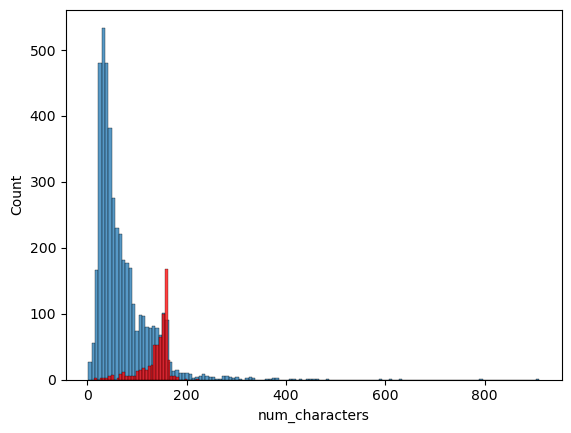

In [205]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

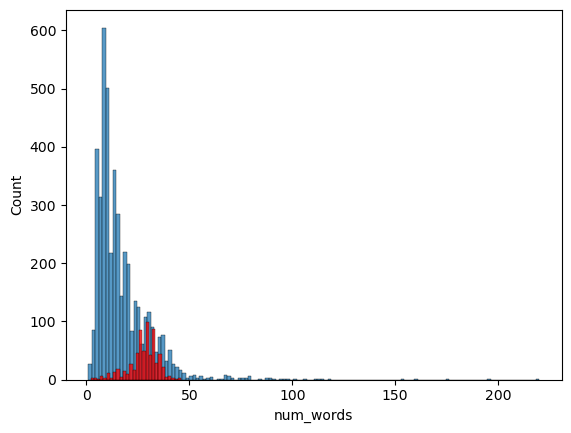

In [206]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

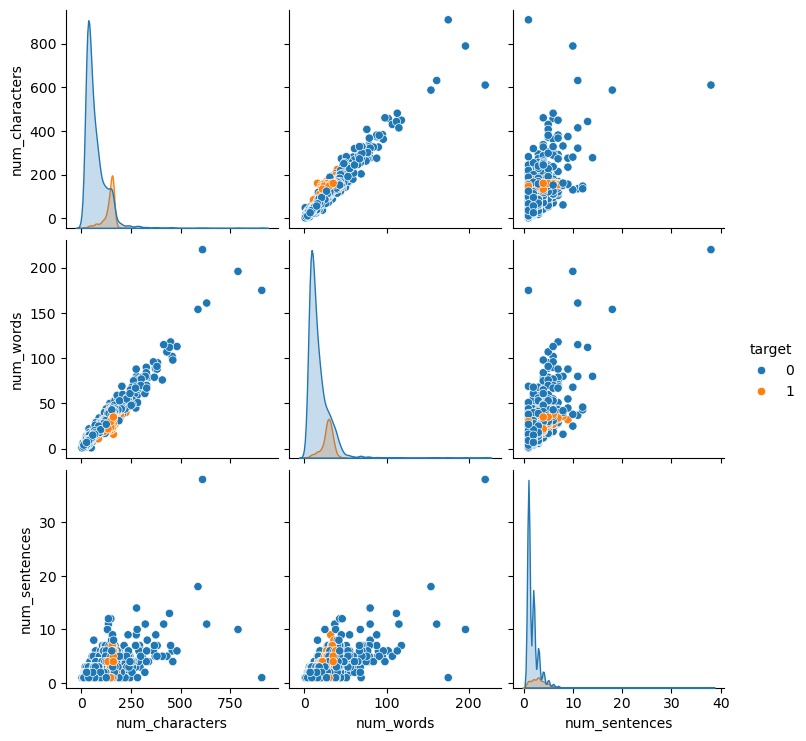

In [207]:
sns.pairplot(df, hue='target')

In [208]:
print(df.dtypes)

target             int32
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object


In [209]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

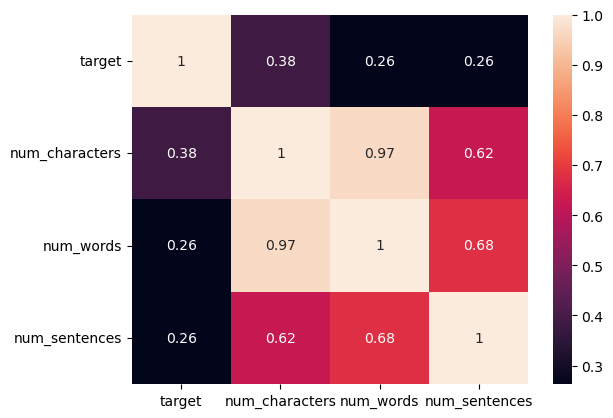

In [210]:
sns.heatmap(numeric_df.corr(),annot=True)

In [211]:
## 3. Data Preprocessing

#lower case
#Tokenization
#Removing special characters
#Removing stopwords and punctuation
#stemming

In [212]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [213]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [214]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [215]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [216]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    
    return " ".join(y)
    
    

In [217]:
transform_text('Hy how  are you Priyanshu, I liked your sense of humour ?')

'hy priyanshu like sens humour'

In [218]:
df['transformed_text']=df['text'].apply(transform_text)

In [219]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [220]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')

In [221]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

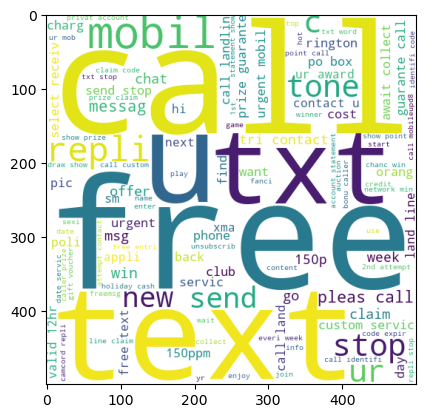

In [222]:
plt.imshow(spam_wc)

In [223]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

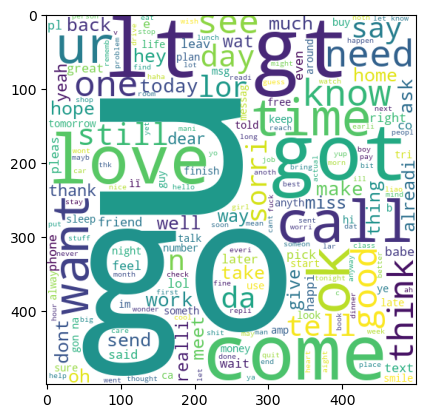

In [224]:
plt.imshow(ham_wc)

In [225]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [226]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [227]:
len(spam_corpus)

9939

In [228]:
from collections import Counter
most_common_words = Counter(spam_corpus).most_common(30)
pd.DataFrame(most_common_words, columns=['word', 'count'])

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


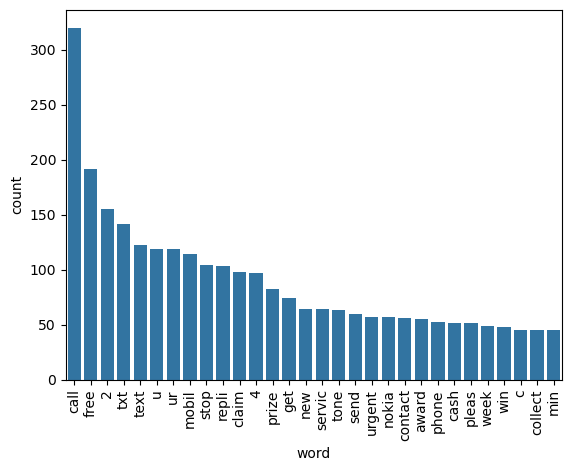

In [229]:
sns.barplot(x='word', y='count', data=pd.DataFrame(most_common_words, columns=['word', 'count']))
plt.xticks(rotation='vertical')
plt.show()

In [230]:
## 4. Model Building

In [231]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [232]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [233]:
X.shape

(5169, 3000)

In [234]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [237]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [238]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [239]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [240]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [241]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [242]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))
pickle.dump(mnb,open('model.pkl','wb'))